# Fusion des fichiers csv pour obtenir qu'un seul gros fichier pk et suppression des doublons

## I) Importation des bibliothèques


In [ ]:
##################
# Initialization #
##################

import os
import sys

print(os.getcwd())
cwd0 = './styles/'
sys.path.append(cwd0)

import visualID as vID
from visualID import  fg, hl, bg
vID.init(cwd0)

import numpy as np
import ase
from ase.io import write
from ase.visualize import view

import pyNanoMatBuilder.utils as pNMBu
import importlib
import pandas as pd

from pyNanoMatBuilder import platonicNPs as pNP

import importlib
importlib.reload(pNP)
importlib.reload(pNMBu)

import glob

## II) Fusion des fichiers csv

**On creer la liste de tous les fichiers csv à fusionner, on les ouvre un par un (dans une boucle) au format data frame,**
**puis on concataine les data frame entre eux pour au final ne former qu'un seul data frame qu'on enregistre en fin au format csv**

In [ ]:

# Création de la liste de tous les fichiers pk (que on a creer et qui sont dans le dossier Base de données) que ont va fusionner
liste_tout_fichiers_pk = glob.glob('stage/Base_de_données/*.pk')

# Création d'un variable portant le chemin d'acces au fichier pk ou il y aura tout ce qu'on a creer 
pk_fichier_global = "stage/Base_de_données_finale/fichier_global.pk"

# Création du data frame vide (df_global) que on va remplir au fur et à mesure
df_global  = pd.DataFrame(columns=["Solid_class","Element", "Shape", "Distance","Size_parameters","Eq_Radius","n_Atoms","qmin","qmax","qstep","b_iso","q","Intensities"])

for fich in liste_tout_fichiers_pk :
    
    # Lecture des fichiers CSV dans des DataFrames
    df_fichier_de_la_boucle = pd.read_pickle(fich)
    
    # Fusionner les DataFrames
    df_global = pd.concat([df_global, df_fichier_de_la_boucle], ignore_index=True)
    
    
    
# Sauvegarder le DataFrame fusionné en CSV
df_global.to_pickle(pk_fichier_global)
 
    



## III) Suppression des doublons dans le Data frame global

**Définition de la fonction qui supprime les doublons**

**Attention, pour information la colonne nbr_couche passe de listes a tuples**

In [9]:
def supprimer_doublons(df):
    """
    Supprime les doublons d'un DataFrame.
    
    Paramètres:
    df (pd.DataFrame): Le DataFrame à traiter.
    
    Retour:
    pd.DataFrame: Un nouveau DataFrame sans doublons.
    """
    # Suppression des lignes dont les 5 premières colonnes sont identiques
    df['Size_parameters'] = df['Size_parameters'].apply(tuple)
    # df['qmin'] = df['qmin'].apply(tuple)
    # df['qmax'] = df['qmax'].apply(tuple)
    # df['qstep'] = df['qstep'].apply(tuple)
    # df['b_iso'] = df['b_iso'].apply(tuple)
    df_sans_doublons = df[~df[["Solid_class","Element", "Shape", "Distance","Size_parameters","Eq_Radius","n_Atoms","qmin","qmax","qstep","b_iso"]].duplicated()]
    
    return df_sans_doublons

**Application de cette fonction sur le dataframe que on a creer**

In [10]:
df_sans_doublons=supprimer_doublons(pd.read_pickle(pk_fichier_global))


**On remet les bons indexs sur chaque lignes et on re enregistre le data frame**

In [11]:
df_sans_doublons=df_sans_doublons.reset_index(drop=True)

df_sans_doublons.to_pickle(pk_fichier_global)

## IV) Réaffichage du dataframe fusionné

**Cela permet de vérifier l'opération**

In [12]:
# Afficher le DataFrame fusionné
df_global = pd.read_pickle(pk_fichier_global)
print("\nContenu du fichier PK fusionné (df_global):")



Contenu du fichier PK fusionné (df_global):


In [13]:
df_global

,Solid_class,Element,Shape,Distance,Size_parameters,Eq_Radius,n_Atoms,qmin,qmax,qstep,b_iso,q,Intensities
0,Platonic,Ag,icosahedron,2.888885,"(3, 0, 0)",8.242478,147,0.01,20,0.01,1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[47670772.0, 47479564.0, 47162360.0, 46721320...."
1,Platonic,Al,icosahedron,2.852398,"(3, 0, 0)",8.138375,147,0.01,20,0.01,1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[3646293.0, 3631879.2, 3607964.2, 3574713.0, 3..."
2,Platonic,Au,icosahedron,2.883758,"(3, 0, 0)",8.227851,147,0.01,20,0.01,1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[134571380.0, 134034744.0, 133144360.0, 131906..."
3,Platonic,Co,icosahedron,2.508815,"(3, 0, 0)",7.158074,147,0.01,20,0.01,1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[15729951.0, 15682065.0, 15602533.0, 15491768...."
4,Platonic,Cr,icosahedron,2.602153,"(3, 0, 0)",7.424384,147,0.01,20,0.01,1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[12429015.0, 12388283.0, 12320651.0, 12226497...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Platonic,Pt,cubebcc,2.788829,"(2, 0, 0)",5.577658,35,0.01,20,0.01,1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[7441678.0, 7428274.0, 7405983.0, 7374875.5, 7..."
200,Platonic,Ru,cubebcc,2.708219,"(2, 0, 0)",5.416438,35,0.01,20,0.01,1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[2370230.0, 2366169.5, 2359414.5, 2349987.0, 2..."
201,Platonic,Sb,cubebcc,3.259762,"(2, 0, 0)",6.519525,35,0.01,20,0.01,1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[3183651.2, 3175805.5, 3162768.2, 3144596.0, 3..."
202,Platonic,Si,cubebcc,2.361737,"(2, 0, 0)",4.723473,35,0.01,20,0.01,1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[239955.31, 239632.95, 239096.52, 238347.31, 2..."


## V) Analyse de nos données finales

**Nous allons tracer les distribution des élements, des formes et du nombre de couche de notre data frame**

**                  Remarque : si on veut une base de données cohérente, il faut le meme nombre de forme en tout et le meme nombre d'éléments par forme également**

KeyError: 'Forme'

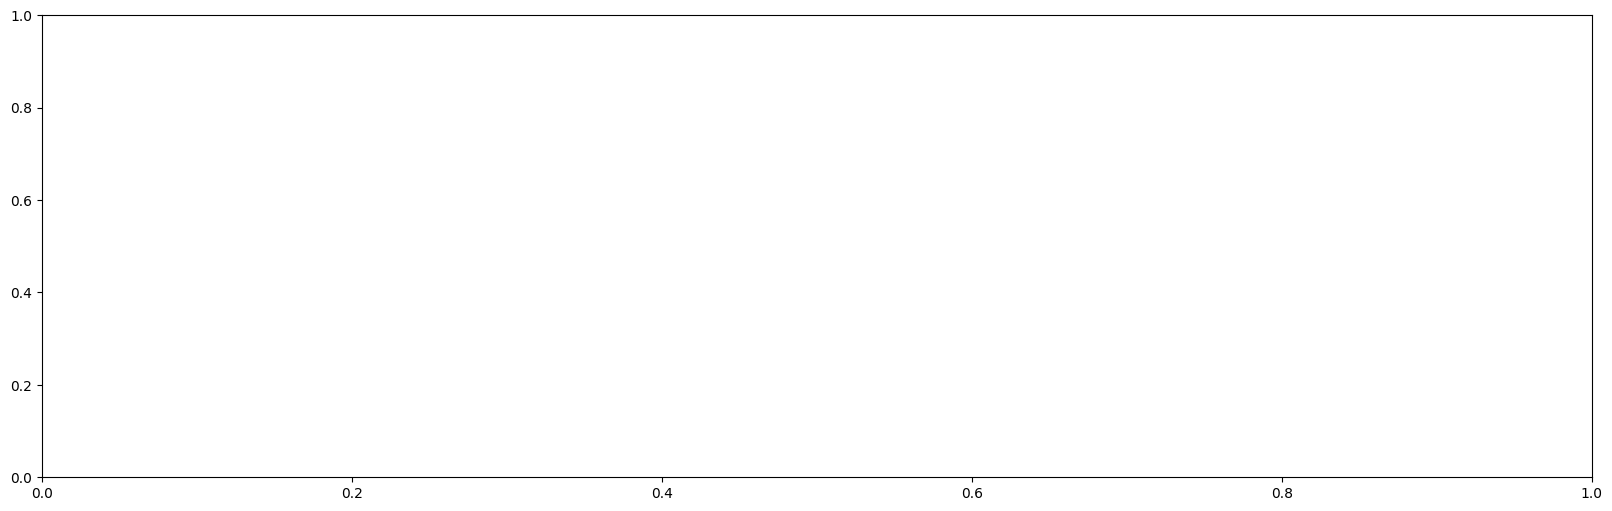

In [8]:

# On va creer un graph qui permet de former la distribution des formes de notre data frame
import matplotlib.pyplot as plt
# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(20,6))

# Tracer l'histogramme
ax.hist(df_global['Forme'], bins=100,edgecolor='black')

# Ajouter des labels aux axes
ax.set_xlabel('Forme')
ax.set_ylabel('Frequency')

# Personnaliser les intervalles de l'axe des x
x_ticks = range(0, 10)  # Plage de 0 à 7
plt.xticks(x_ticks)

# Afficher la figure
plt.show()
#--------------------------------------------------------

# On va creer un graph qui permet de former la distribution des éléments de notre data frame

import matplotlib.pyplot as plt
# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(20,6))


# Tracer l'histogramme
ax.hist(df_global['Element'],bins=100, edgecolor='black')

# Ajouter des labels aux axes
ax.set_xlabel('Element')
ax.set_ylabel('Frequency')


# Personnaliser les intervalles de l'axe des x
x_ticks = range(0, 20)  # Plage de 0 à 20
plt.xticks(x_ticks)


# Afficher la figure

plt.show()

#--------------------------------------------------------

# On va creer un graph qui permet de former la distribution du nombre de couche de notre data frame

import matplotlib.pyplot as plt
# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(20,6))


# Tracer l'histogramme
size=list(df_global['nbr_couche'])

list_size=[]
for x in range (0,df_global.shape[0]):
    list_size.append(size[x][0])

ax.hist(list_size,bins=150, edgecolor='black')

# Ajouter des labels aux axes
ax.set_xlabel('size')
ax.set_ylabel('Frequency')


# Personnaliser les intervalles de l'axe des x
#x_ticks = range(0, 11)  # Plage de 0 à 9
plt.xticks(x_ticks)

#plt.plot(df_global['nbr_couche'][0])
# Afficher la figure

plt.show()